## Watershed algos
Treats a **grayscale** image as a topographical map and finds lines between pixels of equal brightness. These lines are then used to segment the image into regions

3 Types of Watershed:
1. Watershed by flooding (scikit-image's implementation)
2. by topographic distance
3. by drop of water principle

Classic vs. compact watershed

Classic watershed may produce uneven region sizes, may be hard for analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, data, util,filters, color
from skimage.morphology import watershed

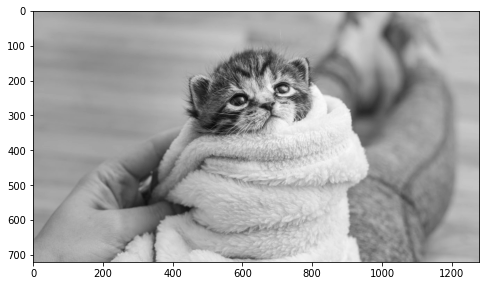

In [2]:
kitten = color.rgb2gray(io.imread("images/kitten.jpeg"))

plt.figure(figsize=(8,8))
plt.imshow(kitten,cmap='gray')

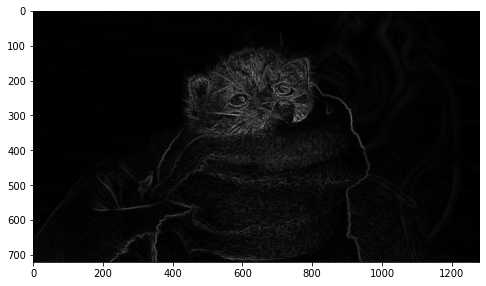

In [3]:
kitten_edge = filters.sobel(kitten)

plt.figure(figsize=(8,8))
plt.imshow(kitten_edge,cmap='gray')

In [4]:
grid = util.regular_grid(kitten.shape,n_points= 300) # find 300 points evenly spaced in the image 
grid

(slice(27, None, 55), slice(27, None, 55))

### The seed matrix is the same shape as the original image, and it contains integers in the range [1, size of image]

Seeds are the image markets from which the water flooding begins

In [6]:
seeds = np.zeros(kitten.shape,dtype=int)

seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape)+1

/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


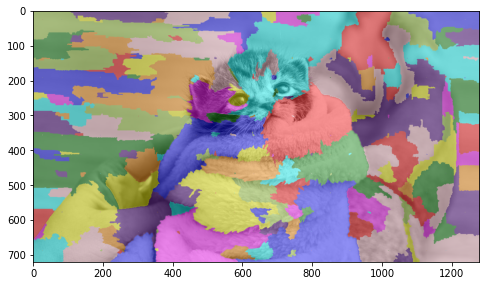

In [8]:
w0 = watershed(kitten_edge,seeds)

water_classic = color.label2rgb(w0,kitten,alpha=0.4,kind="overlay")

plt.figure(figsize=(8,8))
plt.imshow(water_classic)

/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


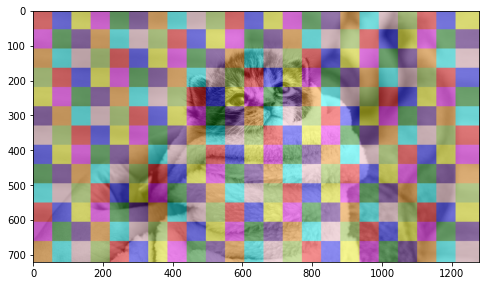

In [9]:
w1 = watershed(kitten_edge, seeds, compactness = 0.91) ## compact watershed produces even region sizes
water_compact = color.label2rgb(w1,kitten,alpha=0.4,kind="overlay")

plt.figure(figsize=(8,8))
plt.imshow(water_compact)